In [115]:
%matplotlib inline

In [36]:
import rospy
import cv2
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

In [37]:
parent_path = "/mnt/current_data/mech/wifimap"

In [39]:
# read wifimapinfo
u,v,res,nap = np.loadtxt(parent_path+"/wifi_map_info.txt")
# convert to u,v,nap to int
u,v,nap = int(u), int(v), int(nap)
# init map as a np.array
wifi_map = np.zeros((v,u,nap))
wifi_map_sd = np.zeros((v,u,1))
# read map info from image
for ap in range(nap):
    wifi_map[:,:,ap] = cv2.imread("{:s}/wifimap{:03d}.ppm".format(parent_path,ap))[:,:,0].astype(np.uint8)
# read var map info from image
wifi_map_sd[:,:,0] = cv2.imread("{:s}/wifisd.ppm".format(parent_path,ap))[:,:,0].astype(np.uint8)
# convert map data to float
wifi_map = wifi_map.astype(np.float64)
wifi_map_sd = wifi_map_sd.astype(np.float64)

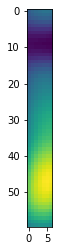

In [210]:
plt.imshow(wifi_map[:,:,0])

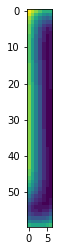

In [211]:
plt.imshow(wifi_map_sd[:,:,0])

In [239]:
def likelihood_map(z,wifi_map, wifi_map_sd):
    logsqrt2pi = 0.5*np.log(2*np.pi)
    sd_nap = np.matmul(wifi_map_sd,np.ones((1,nap)))
    logerr = -np.log(sd_nap) - logsqrt2pi - 0.5*((wifi_map-z)/sd_nap)**2
    # joint likelihood =  exp(sum(alphai*logi)), with sum(alphai)=1
    alpha = z/np.sum(z)
    logtot = np.matmul(logerr,alpha[:,None])
    prob = np.exp(logtot[:,:,0])
    return prob

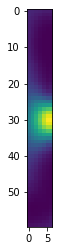

In [246]:
# simple test. Choose a point, compute likelihood map
z = wifi_map[30,5,:]
prob = likelihood_map(z, wifi_map, wifi_map_sd)

plt.imshow(prob)